In the following analysis, we will take a look at impression delivery, CTR, margin% and potentially other metrics over time for the following direct team accounts:

Skechers Rack Room Shoes Britvic Chico's David Yurman OOFOS Roberto Coin Zebco Fishing

notes sara: to do: what is the trend for different KPIs? (impressions, CTR, etc) what is the seasonlaity? what are the peaks? what is the forecast? correlations? outliers? treating outliers month over month performance?

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

%matplotlib inline

In [2]:
df = pd.read_csv("Direct Seasonality Consolidated.csv")

In [3]:
#Checking first 5 rows
df

,Day,Advertiser,Tactic,Package Name,Spend,Uncapped Spend,Margin %,Impressions,Clicks,Video Starts,Video Completes,TrueView VTR,CTV VCR,FB Imps,FB Video Starts,FB Vid Completes,Total Conversions
0,8/3/2017,Skechers,NaN,WOMEN_Skechers_Xaxis Connected TV,5554.43,5934.31,0.38,126262.0,0.0,126328.0,124447.0,NaN,NaN,NaN,NaN,NaN,NaN
1,8/3/2017,Skechers,NaN,MEN_Skechers_Xaxis Connected TV,2062.45,2365.28,0.33,50325.0,0.0,50298.0,49593.0,NaN,NaN,NaN,NaN,NaN,NaN
2,8/3/2017,Skechers,NaN,YOU BRAND_Skechers_Xaxis Connected TV,8050.20,8411.17,0.39,178961.0,0.0,179067.0,176140.0,NaN,NaN,NaN,NaN,NaN,NaN
3,8/3/2017,Skechers,NaN,STREET BRAND_Skechers_Xaxis Connected TV,4633.93,4829.91,0.39,102764.0,0.0,102710.0,101170.0,NaN,NaN,NaN,NaN,NaN,NaN
4,8/4/2017,Skechers,PreRoll,STREET BRAND_Skechers_Xaxis Video Pre-roll,99.38,199.29,-0.25,12264.0,3.0,4671.0,6208.0,NaN,NaN,NaN,NaN,NaN,NaN
5,8/4/2017,Skechers,NaN,STREET BRAND_Skechers_Xaxis Connected TV,4013.63,4183.38,0.30,89008.0,0.0,89147.0,88133.0,NaN,NaN,NaN,NaN,NaN,NaN
6,8/4/2017,Skechers,Amazon Video,MEN_Skechers_Amazon Video,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8/4/2017,Skechers,YouTube TrueView,MEN_Skechers_YouTube TrueView,1211.16,1211.94,0.59,38609.0,40.0,NaN,13466.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8/4/2017,Skechers,NaN,MEN_Skechers_Xaxis Connected TV,1781.85,2043.47,0.23,43478.0,0.0,43482.0,42986.0,NaN,NaN,NaN,NaN,NaN,NaN
9,8/4/2017,Skechers,NaN,WOMEN_Skechers_Xaxis Connected TV,4795.22,5123.19,0.28,109004.0,0.0,108957.0,107838.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

#Checking data types and number of nulls for full dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18465 entries, 0 to 18464
Data columns (total 17 columns):
Day                  18465 non-null object
Advertiser           18465 non-null object
Tactic               9849 non-null object
Package Name         18465 non-null object
Spend                18465 non-null float64
Uncapped Spend       18323 non-null object
Margin %             13318 non-null float64
Impressions          14593 non-null float64
Clicks               14590 non-null float64
Video Starts         9024 non-null float64
Video Completes      11437 non-null float64
TrueView VTR         649 non-null object
CTV VCR              362 non-null object
FB Imps              389 non-null object
FB Video Starts      389 non-null object
FB Vid Completes     389 non-null object
Total Conversions    543 non-null object
dtypes: float64(6), object(11)
memory usage: 2.4+ MB


In [5]:
#Finding missing values for Impressions
df["Impressions"].isnull().sum()

3872

In [6]:
#Checking dataframe shape
df.shape

(18465, 17)

In [7]:
#removing missing values from impressions column and creating new dataframe
df_imps_cleaned = df[df["Impressions"].notnull()]

In [8]:
#Checking shape of cleaned dataframe
df_imps_cleaned.shape

(14593, 17)

In [9]:
#checking data types of new dataframe
df_imps_cleaned.dtypes

Day                   object
Advertiser            object
Tactic                object
Package Name          object
Spend                float64
Uncapped Spend        object
Margin %             float64
Impressions          float64
Clicks               float64
Video Starts         float64
Video Completes      float64
TrueView VTR          object
CTV VCR               object
FB Imps               object
FB Video Starts       object
FB Vid Completes      object
Total Conversions     object
dtype: object

In [10]:

#inspecting date column
df_imps_cleaned["Day"].head()

0    8/3/2017
1    8/3/2017
2    8/3/2017
3    8/3/2017
4    8/4/2017
Name: Day, dtype: object

In [11]:
#Updating date field to pandas datetime
df_imps_cleaned["Day"] = pd.to_datetime(df_imps_cleaned["Day"])
df_imps_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14593 entries, 0 to 18462
Data columns (total 17 columns):
Day                  14593 non-null datetime64[ns]
Advertiser           14593 non-null object
Tactic               7933 non-null object
Package Name         14593 non-null object
Spend                14593 non-null float64
Uncapped Spend       14491 non-null object
Margin %             13318 non-null float64
Impressions          14593 non-null float64
Clicks               14590 non-null float64
Video Starts         9024 non-null float64
Video Completes      11437 non-null float64
TrueView VTR         649 non-null object
CTV VCR              362 non-null object
FB Imps              389 non-null object
FB Video Starts      389 non-null object
FB Vid Completes     389 non-null object
Total Conversions    521 non-null object
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 2.0+ MB


/home/nyros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
#Pivoting total impressions by day
imps_pivot = pd.pivot_table(df_imps_cleaned, values="Impressions", index="Day", aggfunc=np.sum).reset_index()
imps_pivot.head()

,Day,Impressions
0,2017-08-03,458312.0
1,2017-08-04,1580151.0
2,2017-08-05,3713114.0
3,2017-08-06,4266741.0
4,2017-08-07,4291094.0


In [13]:
#Updating printing options for whole numbers and decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [14]:
imps_pivot.describe()

,Impressions
count,864.000
mean,3286194.498
std,3144276.970
min,0.000
25%,1230775.750
50%,2304911.000
75%,4007025.000
max,18750050.000


/home/nyros/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


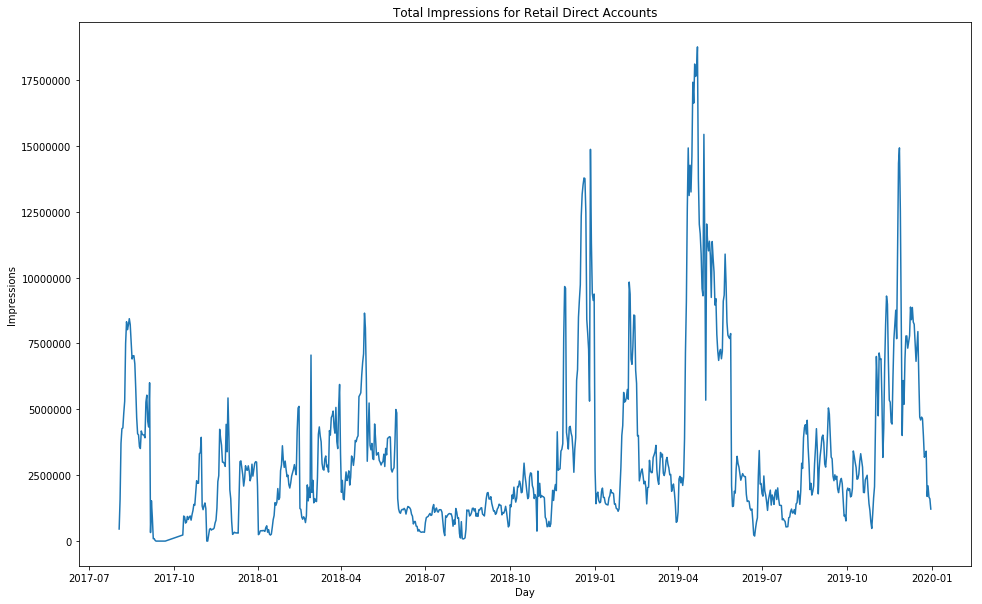

In [15]:
#Line plot for total impressions by day
fig, ax = plt.subplots(figsize=(16, 10)) 
g = sns.lineplot(ax=ax, data=imps_pivot, x='Day', y='Impressions')
plt.ylabel('Impressions')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Impressions for Retail Direct Accounts')
plt.show()

In [16]:
#Pivoting total impressions by day and advertiser
imps_advertiser_pivot = pd.pivot_table(df_imps_cleaned, values="Impressions", index=["Day", "Advertiser"], 
                                      aggfunc=np.sum).reset_index()
imps_advertiser_pivot.head()

,Day,Advertiser,Impressions
0,2017-08-03,Skechers,458312.000
1,2017-08-04,Skechers,1580151.000
2,2017-08-05,Skechers,3713114.000
3,2017-08-06,Skechers,4266741.000
4,2017-08-07,Skechers,4291094.000


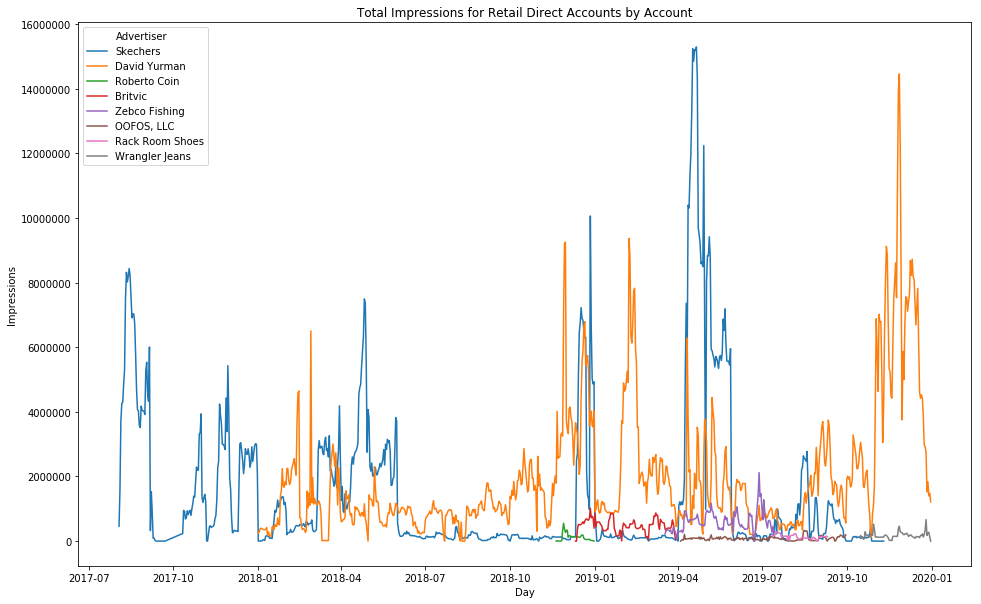

In [17]:
#Line Plot impressions by by advertiser
fig, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(ax=ax, data=imps_advertiser_pivot, x="Day", y="Impressions", hue="Advertiser")
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("Impressions")
plt.title("Total Impressions for Retail Direct Accounts by Account")
plt.show()

In [18]:
#Cleaning the dataframe to remove rows with null clicks, inspecting dataframe
df_clicks_cleaned = df_imps_cleaned[df_imps_cleaned["Clicks"].notnull()]
df_clicks_cleaned.head()

,Day,Advertiser,Tactic,Package Name,Spend,Uncapped Spend,Margin %,Impressions,Clicks,Video Starts,Video Completes,TrueView VTR,CTV VCR,FB Imps,FB Video Starts,FB Vid Completes,Total Conversions
0,2017-08-03,Skechers,NaN,WOMEN_Skechers_Xaxis Connected TV,5554.430,5934.31,0.380,126262.000,0.000,126328.000,124447.000,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-03,Skechers,NaN,MEN_Skechers_Xaxis Connected TV,2062.450,2365.28,0.330,50325.000,0.000,50298.000,49593.000,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-03,Skechers,NaN,YOU BRAND_Skechers_Xaxis Connected TV,8050.200,8411.17,0.390,178961.000,0.000,179067.000,176140.000,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-03,Skechers,NaN,STREET BRAND_Skechers_Xaxis Connected TV,4633.930,4829.91,0.390,102764.000,0.000,102710.000,101170.000,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-04,Skechers,PreRoll,STREET BRAND_Skechers_Xaxis Video Pre-roll,99.380,199.29,-0.250,12264.000,3.000,4671.000,6208.000,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#clicks by day by advertiser pivot
clicks_advertiser_pivot = pd.pivot_table(df_clicks_cleaned, values=["Impressions", "Clicks"], index=["Day", "Advertiser"], 
                                      aggfunc=np.sum).reset_index()
clicks_advertiser_pivot

,Day,Advertiser,Clicks,Impressions
0,2017-08-03,Skechers,0.000,458312.000
1,2017-08-04,Skechers,1316.000,1580151.000
2,2017-08-05,Skechers,2536.000,3713114.000
3,2017-08-06,Skechers,2237.000,4266741.000
4,2017-08-07,Skechers,2197.000,4291094.000
5,2017-08-08,Skechers,2325.000,4854977.000
6,2017-08-09,Skechers,2629.000,5305955.000
7,2017-08-10,Skechers,6715.000,7494257.000
8,2017-08-11,Skechers,10531.000,8321200.000
9,2017-08-12,Skechers,11392.000,8021897.000


In [20]:
#Creating CTR column
clicks_advertiser_pivot["CTR"] = (clicks_advertiser_pivot["Clicks"] / clicks_advertiser_pivot["Impressions"]) * 100
clicks_advertiser_pivot.head()

,Day,Advertiser,Clicks,Impressions,CTR
0,2017-08-03,Skechers,0.000,458312.000,0.000
1,2017-08-04,Skechers,1316.000,1580151.000,0.083
2,2017-08-05,Skechers,2536.000,3713114.000,0.068
3,2017-08-06,Skechers,2237.000,4266741.000,0.052
4,2017-08-07,Skechers,2197.000,4291094.000,0.051


In [21]:
#Total Clicks by day pivot
clicks_pivot = pd.pivot_table(df_clicks_cleaned, values=["Impressions", "Clicks"], index=["Day"], 
                                      aggfunc=np.sum).reset_index()
clicks_pivot.head()

,Day,Clicks,Impressions
0,2017-08-03,0.000,458312.000
1,2017-08-04,1316.000,1580151.000
2,2017-08-05,2536.000,3713114.000
3,2017-08-06,2237.000,4266741.000
4,2017-08-07,2197.000,4291094.000


In [22]:
#Creating CTR column
clicks_pivot["CTR"] = (clicks_pivot["Clicks"] / clicks_pivot["Impressions"]) * 100
clicks_pivot.head()

,Day,Clicks,Impressions,CTR
0,2017-08-03,0.000,458312.000,0.000
1,2017-08-04,1316.000,1580151.000,0.083
2,2017-08-05,2536.000,3713114.000,0.068
3,2017-08-06,2237.000,4266741.000,0.052
4,2017-08-07,2197.000,4291094.000,0.051


Text(0.5, 1.0, 'CTR for Retail Direct Accounts by Account')

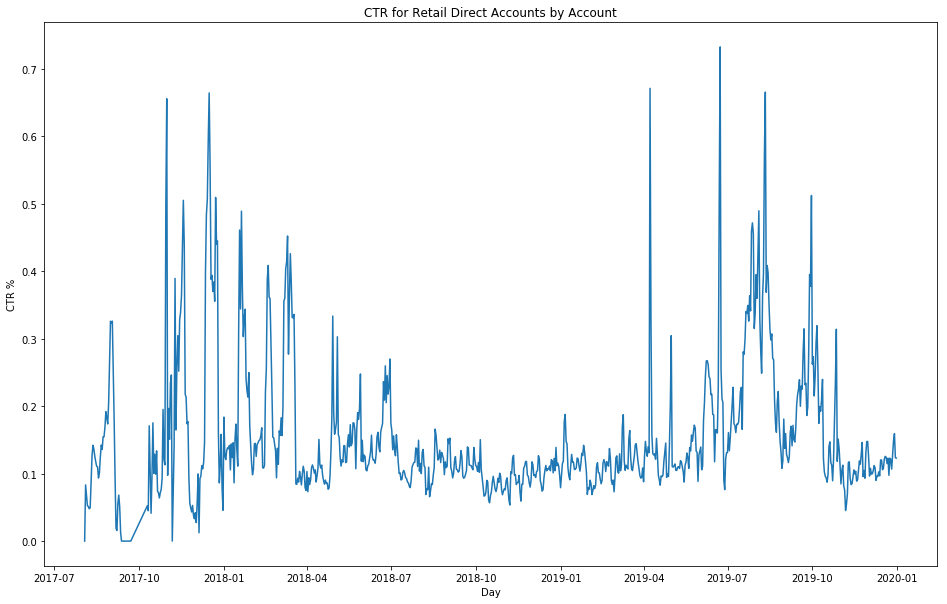

In [23]:
#Line Plot overaall CTR
fig, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(ax=ax, data=clicks_pivot, x="Day", y="CTR")
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("CTR %")
plt.title("CTR for Retail Direct Accounts by Account")
#plt.show()

In [24]:
#descriptive stats for clicks by advertiser
clicks_advertiser_pivot.describe()

,Clicks,Impressions,CTR
count,2124.000,2124.000,2100.000
mean,1870.052,1336615.875,0.329
std,2976.968,2074971.637,5.724
min,0.000,0.000,0.000
25%,158.000,130446.750,0.086
50%,799.000,522745.500,0.116
75%,2097.250,1589689.250,0.180
max,25820.000,15295038.000,250.000


In [25]:
#Removing rows where CTR is above 10 
clicks_advertiser_pivot = clicks_advertiser_pivot[clicks_advertiser_pivot["CTR"] < 10]

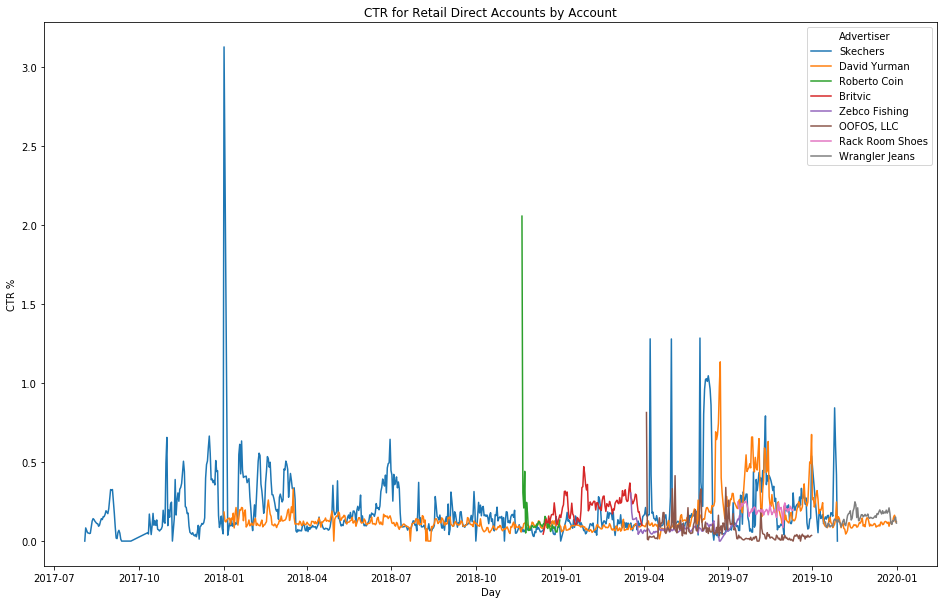

In [26]:
#Line Plot CTR by advertiser
fig, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(ax=ax, data=clicks_advertiser_pivot, x="Day", y="CTR", hue="Advertiser")
plt.ticklabel_format(style="plain", axis="y")
plt.ylabel("CTR %")
plt.title("CTR for Retail Direct Accounts by Account")
plt.show()

In [27]:
df_clicks_cleaned.head()

,Day,Advertiser,Tactic,Package Name,Spend,Uncapped Spend,Margin %,Impressions,Clicks,Video Starts,Video Completes,TrueView VTR,CTV VCR,FB Imps,FB Video Starts,FB Vid Completes,Total Conversions
0,2017-08-03,Skechers,NaN,WOMEN_Skechers_Xaxis Connected TV,5554.430,5934.31,0.380,126262.000,0.000,126328.000,124447.000,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-03,Skechers,NaN,MEN_Skechers_Xaxis Connected TV,2062.450,2365.28,0.330,50325.000,0.000,50298.000,49593.000,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-03,Skechers,NaN,YOU BRAND_Skechers_Xaxis Connected TV,8050.200,8411.17,0.390,178961.000,0.000,179067.000,176140.000,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-03,Skechers,NaN,STREET BRAND_Skechers_Xaxis Connected TV,4633.930,4829.91,0.390,102764.000,0.000,102710.000,101170.000,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-04,Skechers,PreRoll,STREET BRAND_Skechers_Xaxis Video Pre-roll,99.380,199.29,-0.250,12264.000,3.000,4671.000,6208.000,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#Adding Year and Month to the dataframe
df_clicks_cleaned["Day"] = pd.to_datetime(df_clicks_cleaned["Day"], errors='coerce')
df_clicks_cleaned["Month"] = df_clicks_cleaned["Day"].dt.month
df_clicks_cleaned["Year"] = df_clicks_cleaned["Day"].dt.year

/home/nyros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nyros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nyros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [29]:
df_clicks_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14590 entries, 0 to 18462
Data columns (total 19 columns):
Day                  14590 non-null datetime64[ns]
Advertiser           14590 non-null object
Tactic               7930 non-null object
Package Name         14590 non-null object
Spend                14590 non-null float64
Uncapped Spend       14488 non-null object
Margin %             13315 non-null float64
Impressions          14590 non-null float64
Clicks               14590 non-null float64
Video Starts         9024 non-null float64
Video Completes      11437 non-null float64
TrueView VTR         649 non-null object
CTV VCR              362 non-null object
FB Imps              389 non-null object
FB Video Starts      389 non-null object
FB Vid Completes     389 non-null object
Total Conversions    521 non-null object
Month                14590 non-null int64
Year                 14590 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(10)
memory usage: 2.

In [30]:
df_clicks_cleaned.head()

,Day,Advertiser,Tactic,Package Name,Spend,Uncapped Spend,Margin %,Impressions,Clicks,Video Starts,Video Completes,TrueView VTR,CTV VCR,FB Imps,FB Video Starts,FB Vid Completes,Total Conversions,Month,Year
0,2017-08-03,Skechers,NaN,WOMEN_Skechers_Xaxis Connected TV,5554.430,5934.31,0.380,126262.000,0.000,126328.000,124447.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017
1,2017-08-03,Skechers,NaN,MEN_Skechers_Xaxis Connected TV,2062.450,2365.28,0.330,50325.000,0.000,50298.000,49593.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017
2,2017-08-03,Skechers,NaN,YOU BRAND_Skechers_Xaxis Connected TV,8050.200,8411.17,0.390,178961.000,0.000,179067.000,176140.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017
3,2017-08-03,Skechers,NaN,STREET BRAND_Skechers_Xaxis Connected TV,4633.930,4829.91,0.390,102764.000,0.000,102710.000,101170.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017
4,2017-08-04,Skechers,PreRoll,STREET BRAND_Skechers_Xaxis Video Pre-roll,99.380,199.29,-0.250,12264.000,3.000,4671.000,6208.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017


In [31]:
#Pivoting overall clicks by year
clicks_year_pivot = pd.pivot_table(df_clicks_cleaned, values=["Impressions", "Clicks"], index=["Year"], 
                                      aggfunc=np.sum).reset_index()
clicks_year_pivot.head()

,Year,Clicks,Impressions
0,2017,616986.000,334174450.000
1,2018,1239274.000,940195259.000
2,2019,2115731.000,1564602410.000


In [32]:
#Creating CTR column
clicks_year_pivot["CTR"] = (clicks_year_pivot["Clicks"] / clicks_year_pivot["Impressions"]) * 100
clicks_year_pivot.head()

,Year,Clicks,Impressions,CTR
0,2017,616986.000,334174450.000,0.185
1,2018,1239274.000,940195259.000,0.132
2,2019,2115731.000,1564602410.000,0.135


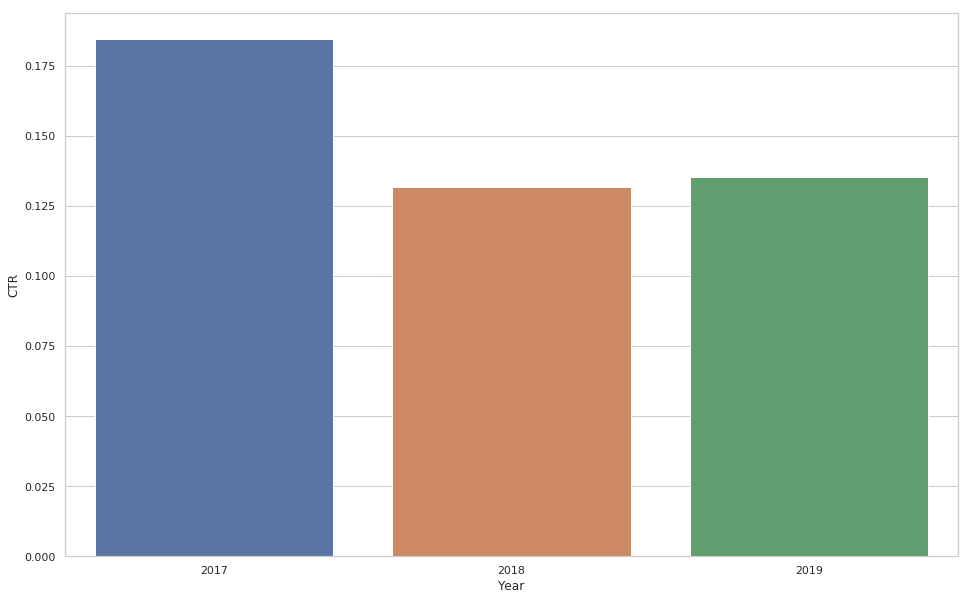

In [33]:
#Bar Plot for YoY CTR
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(x="Year", y="CTR", data=clicks_year_pivot)

In [34]:
#Month-Yearcombo column
df_clicks_cleaned["MonthYear"] = df_clicks_cleaned["Day"].dt.strftime('%Y-%m')
df_clicks_cleaned.head()

/home/nyros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Day,Advertiser,Tactic,Package Name,Spend,Uncapped Spend,Margin %,Impressions,Clicks,Video Starts,Video Completes,TrueView VTR,CTV VCR,FB Imps,FB Video Starts,FB Vid Completes,Total Conversions,Month,Year,MonthYear
0,2017-08-03,Skechers,NaN,WOMEN_Skechers_Xaxis Connected TV,5554.430,5934.31,0.380,126262.000,0.000,126328.000,124447.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017,2017-08
1,2017-08-03,Skechers,NaN,MEN_Skechers_Xaxis Connected TV,2062.450,2365.28,0.330,50325.000,0.000,50298.000,49593.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017,2017-08
2,2017-08-03,Skechers,NaN,YOU BRAND_Skechers_Xaxis Connected TV,8050.200,8411.17,0.390,178961.000,0.000,179067.000,176140.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017,2017-08
3,2017-08-03,Skechers,NaN,STREET BRAND_Skechers_Xaxis Connected TV,4633.930,4829.91,0.390,102764.000,0.000,102710.000,101170.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017,2017-08
4,2017-08-04,Skechers,PreRoll,STREET BRAND_Skechers_Xaxis Video Pre-roll,99.380,199.29,-0.250,12264.000,3.000,4671.000,6208.000,NaN,NaN,NaN,NaN,NaN,NaN,8,2017,2017-08


In [35]:
#Aggregating by Month
clicks_month_pivot = pd.pivot_table(df_clicks_cleaned, values=["Impressions", "Clicks"], index=["MonthYear"], 
                                      aggfunc=np.sum).reset_index()
clicks_month_pivot.head()

,MonthYear,Clicks,Impressions
0,2017-08,197782.000,154217353.000
1,2017-09,60634.000,28619291.000
2,2017-10,69485.000,32162253.000
3,2017-11,95283.000,57761336.000
4,2017-12,193802.000,61414217.000


In [36]:
clicks_month_pivot["CTR"] = (clicks_month_pivot["Clicks"] / clicks_month_pivot["Impressions"]) * 100
clicks_month_pivot.head()

,MonthYear,Clicks,Impressions,CTR
0,2017-08,197782.000,154217353.000,0.128
1,2017-09,60634.000,28619291.000,0.212
2,2017-10,69485.000,32162253.000,0.216
3,2017-11,95283.000,57761336.000,0.165
4,2017-12,193802.000,61414217.000,0.316


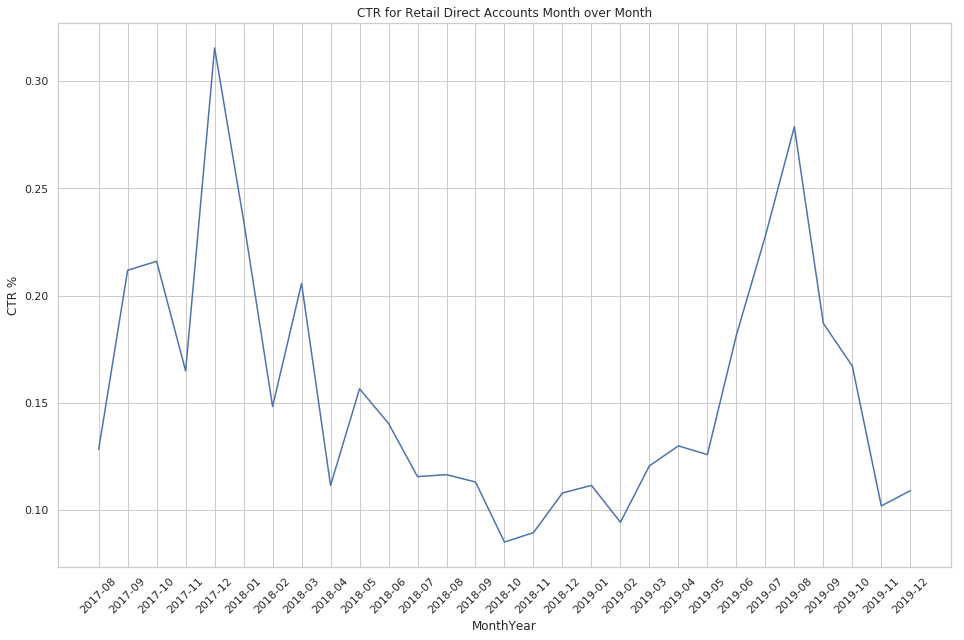

In [37]:
#Line Plot overaall CTR
fig, ax = plt.subplots(figsize=(16, 10))
g = sns.lineplot(ax=ax, data=clicks_month_pivot, x="MonthYear", y="CTR")
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45)
plt.ylabel("CTR %")
plt.title("CTR for Retail Direct Accounts Month over Month")
plt.show()

In [38]:
clicks_month_pivot

,MonthYear,Clicks,Impressions,CTR
0,2017-08,197782.000,154217353.000,0.128
1,2017-09,60634.000,28619291.000,0.212
2,2017-10,69485.000,32162253.000,0.216
3,2017-11,95283.000,57761336.000,0.165
4,2017-12,193802.000,61414217.000,0.316
5,2018-01,89556.000,38087672.000,0.235
6,2018-02,97013.000,65406876.000,0.148
7,2018-03,221641.000,107734120.000,0.206
8,2018-04,132585.000,118887114.000,0.112
9,2018-05,169886.000,108503577.000,0.157


In [39]:
clicks_month_pivot.shape

(29, 4)

In [40]:
clicks_year_pivot.shape

(3, 4)

In [41]:
clicks_year_pivot


,Year,Clicks,Impressions,CTR
0,2017,616986.000,334174450.000,0.185
1,2018,1239274.000,940195259.000,0.132
2,2019,2115731.000,1564602410.000,0.135


In [42]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

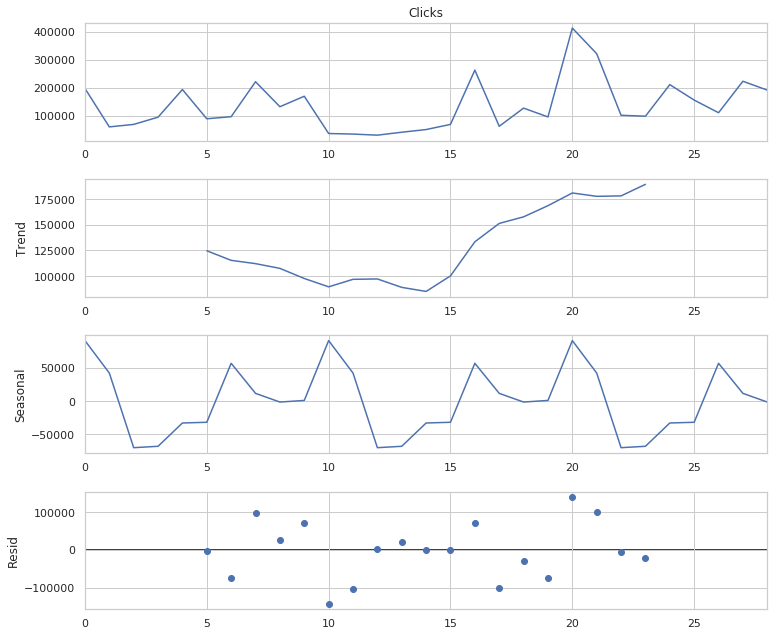

In [50]:
rcParams['figure.figsize']= 11, 9 
decomposition=sm.tsa.seasonal_decompose(clicks_month_pivot['Clicks'],period=10)
fig=decomposition.plot()
plt.show()

In [54]:
rcParams['figure.figsize']= 11, 9 
decomposition=sm.tsa.seasonal_decompose(clicks_year_pivot['Clicks'],period=2)
fig=decomposition.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 4 observations. x only has 3 observation(s)

In [ ]:
statsmodels